# Conway's Game of Life with MPI
### Naumov, Gusak

In [5]:
import numpy as np
import imageio
import os
import time
import matplotlib.cm as cm
from scipy.sparse import rand
from scipy.signal import convolve2d
import matplotlib.pyplot as plt

In [6]:
def get_step(mapp, ker):
    
    new_map = mapp.copy()
    new_map = convolve2d(np.pad(new_map,1, 'wrap'), ker, mode='valid')
    
    return np.where((new_map == 3) | ((new_map == 2) & (mapp == 1)), 1., 0.)

def conway(mapp, step_count):
    
    ker = np.array([[1, 1, 1],
                    [1, 0, 1],
                    [1, 1, 1]]).astype(np.float32)
    
    cells_alive = [np.sum(mapp)]
    states_map = [mapp]
    for i in range(step_count):
        
        mapp = get_step(mapp, ker)
        cells_alive.append(np.sum(mapp))
        states_map.append(mapp)
    
    return states_map, cells_alive

def plot_alive_gif(game_name, step_count=150):
    
    states_map, cells_alive = conway(game_name, step_count - 1)
    if not os.path.exists('./gifs/'):

        os.mkdir('./gifs/')

    for i in range(len(states_map)):

        plt.figure(figsize=(7, 7))
        plt.imshow(states_map[i], cmap=cm.binary_r)
        plt.axis('off')
        plt.savefig(f'./gifs/{i}.jpg', bbox_inches='tight')
        plt.close('all')

        
    # save gif    
    filenames = list(filename for filename in os.listdir('./gifs/') if filename.endswith('jpg'))
    filenames = sorted(filenames, key=lambda x: int(os.path.splitext(x)[0].split('-')[-1]))
    images = []
    
    for i, name in enumerate(filenames):

        images.append(imageio.imread('./gifs/' + name))
    imageio.mimsave('./gifs/00_gif_to_share.gif', images)
           
        
    # plot alive cells vs iteration    
    plt.figure(figsize=(14, 8))
    
    plt.plot(np.arange(1, len(cells_alive) + 1), cells_alive, linewidth=4)
    plt.ylabel('Number cells alive', fontsize=24)
    plt.xlabel('Number of iteration', fontsize=24)
    plt.tick_params(labelsize = 16);

## Random 

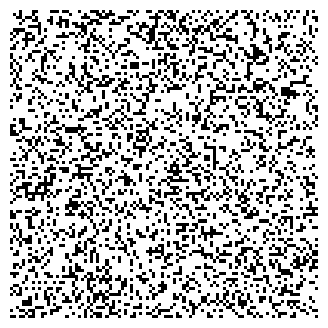

In [7]:
start_rand = rand(100, 100, format='csr', density=0.3)
start_rand.data[:] = 1
start_rand = start_rand.todense()

plt.figure(figsize=(7, 4))
plt.imshow(start_rand, cmap=cm.binary)
plt.axis('off');

C:\Users\danil\AppData\Local\Temp\ipykernel_31496\168629230.py:47: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread('./gifs/' + name))


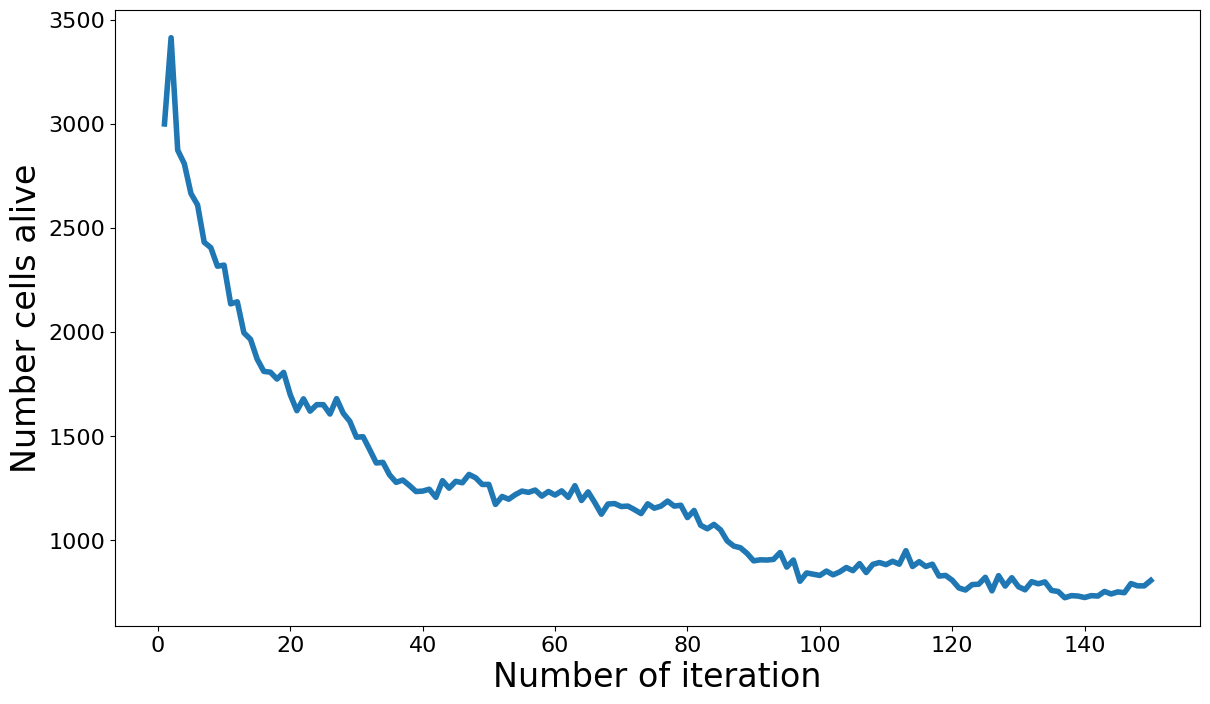

In [8]:
plot_alive_gif(start_rand)

## 106P135

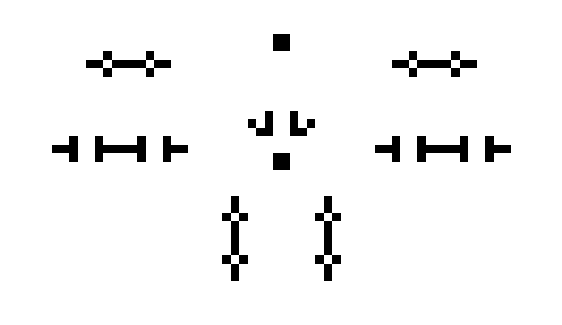

In [9]:
start_106P135 = """................................................................
................................................................
................................................................
...............................OO...............................
...............................OO...............................
...........O....O..............................O....O...........
.........OO.OOOO.OO..........................OO.OOOO.OO.........
...........O....O..............................O....O...........
................................................................
................................................................
................................................................
................................................................
..............................O..O..............................
............................O.O..O.O............................
.............................OO..OO.............................
.......O..O....O..O..........................O..O....O..O.......
.....OOO..OOOOOO..OOO......................OOO..OOOOOO..OOO.....
.......O..O....O..O............OO............O..O....O..O.......
...............................OO...............................
................................................................
................................................................
................................................................
..........................O..........O..........................
..........................O..........O..........................
.........................O.O........O.O.........................
..........................O..........O..........................
..........................O..........O..........................
..........................O..........O..........................
..........................O..........O..........................
.........................O.O........O.O.........................
..........................O..........O..........................
..........................O..........O..........................
................................................................
................................................................
................................................................
................................................................"""

start_106P135 = start_106P135.replace('.', '0').replace('O', '1')
start_106P135 = np.array([list(row) for row in start_106P135.split('\n')]).astype(np.float32)

plt.figure(figsize=(7, 4))
plt.imshow(start_106P135, cmap=cm.binary)
plt.axis('off');

C:\Users\danil\AppData\Local\Temp\ipykernel_31496\168629230.py:47: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread('./gifs/' + name))


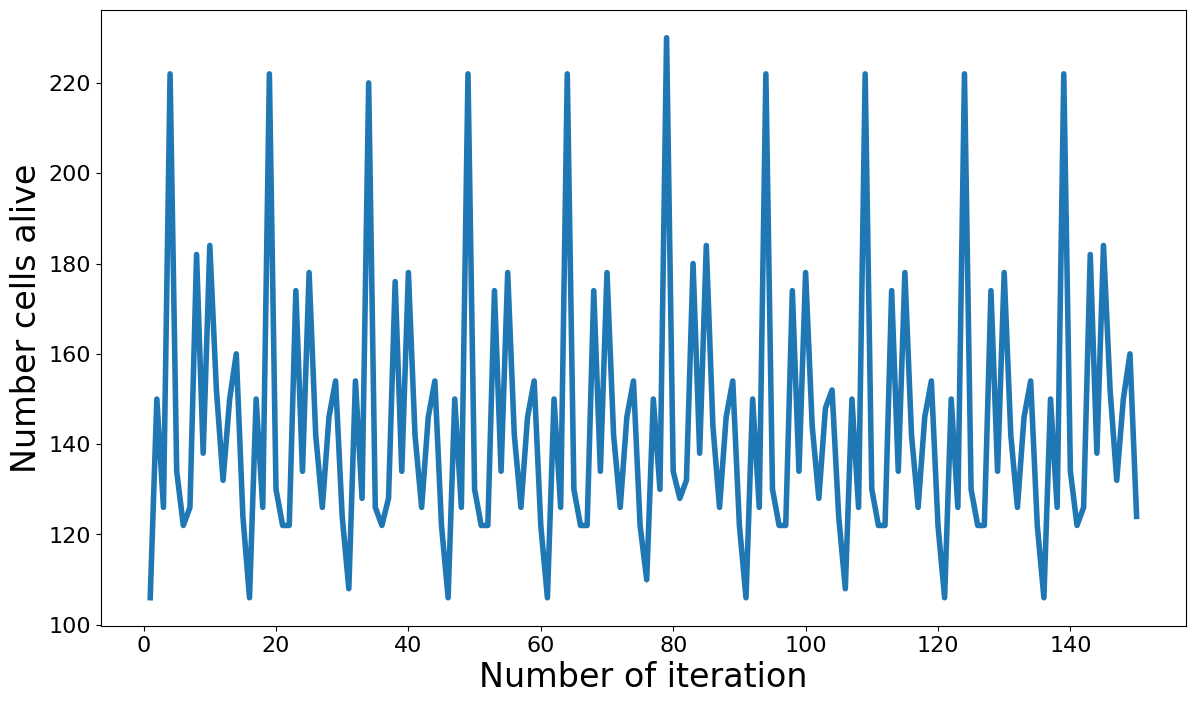

In [10]:
plot_alive_gif(start_106P135)

## Spaceship

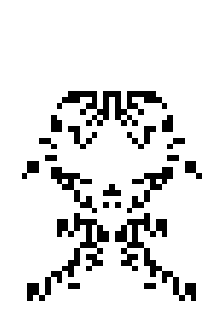

In [11]:
start_spaceship = """...................................
...................................
...................................
...................................
...................................
...................................
...................................
...................................
...................................
...................................
...................................
...................................
...................................
...................................
..........OOOOO.OOO.OOOOO..........
.........OOO..O.O.O.O..OOO.........
........O....OO.O.O.OO....O........
............O..OO.OO..O............
.......O......O.O.O.O......O.......
.......OO....O.O...O.O....OO.......
.......OO.OO...........OO.OO.......
...........O..O.....O..O...........
.....OO....O.O.......O.O....OO.....
.......O....O.........O....O.......
...................................
......OO...................OO......
...OO.........................OO...
...OO..OO.................OO..OO...
..O....OOOOO...........OOOOO....O..
........O.O.OO.......OO.O.O........
.........OO......O......OO.........
...........O....OOO....O...........
...........O.O.......O.O...........
............OO..O.O..OO............
..............O.....O..............
...........O...........O...........
........OO.OOOO.....OOOO.OO........
........OO.O.O.O...O.O.O.OO........
........O.O..O.OO.OO.O..O.O........
.............O.OO.OO.O.............
............OOO.....OOO............
...........O...O...O...O...........
...........O.OO.....OO.O...........
..........OO..OO...OO..OO..........
.........OO..O.......O..OO.........
.......OO.O.............O.OO.......
......O.O.................O.O......
...OO.O...OO...........OO...O.OO...
...OO.O.....................O.OO...
...O.O.......................O.O...
...................................
...................................
..................................."""

start_spaceship = start_spaceship.replace('.', '0').replace('O', '1')
start_spaceship = np.array([list(row) for row in start_spaceship.split('\n')]).astype(np.float32)

plt.figure(figsize=(7, 4))
plt.imshow(start_spaceship, cmap=cm.binary)
plt.axis('off');

C:\Users\danil\AppData\Local\Temp\ipykernel_31496\168629230.py:47: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread('./gifs/' + name))


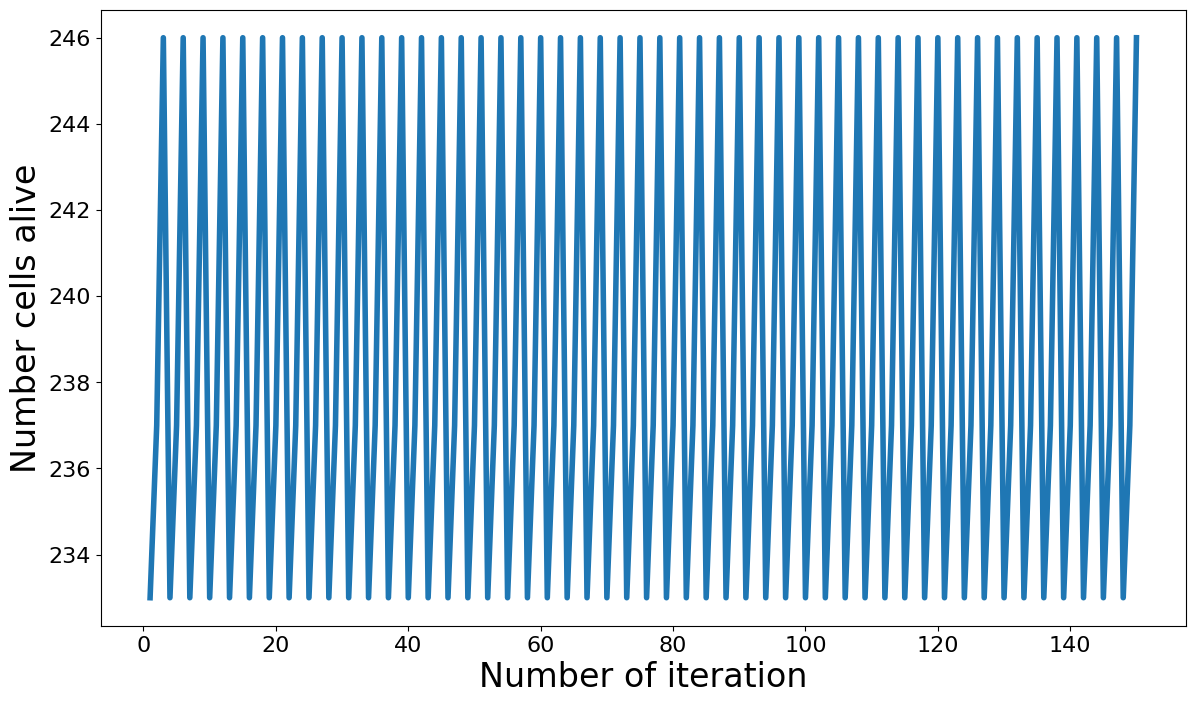

In [12]:
plot_alive_gif(start_spaceship)

## 112P51

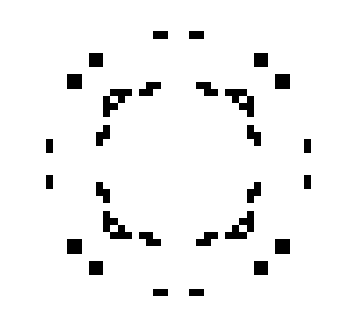

In [18]:
start_112P51 = """...............................................
...............................................
...............................................
....................OO...OO....................
...............................................
...............................................
...........OO.....................OO...........
...........OO.....................OO...........
...............................................
........OO...........................OO........
........OO.........OO.....OO.........OO........
..............OOO.OO.......OO.OOO..............
.............O.O...............O.O.............
.............OO.................OO.............
.............O...................O.............
...............................................
.............O...................O.............
............OO...................OO............
.....O......O.....................O......O.....
.....O...................................O.....
...............................................
...............................................
...............................................
.....O...................................O.....
.....O......O.....................O......O.....
............OO...................OO............
.............O...................O.............
...............................................
.............O...................O.............
.............OO.................OO.............
.............O.O...............O.O.............
..............OOO.OO.......OO.OOO..............
........OO.........OO.....OO.........OO........
........OO...........................OO........
...............................................
...........OO.....................OO...........
...........OO.....................OO...........
...............................................
...............................................
....................OO...OO....................
...............................................
...............................................
..............................................."""

start_112P51 = start_112P51.replace('.', '0').replace('O', '1')
start_112P51 = np.array([list(row) for row in start_112P51.split('\n')]).astype(np.float32)

plt.figure(figsize=(7, 4))
plt.imshow(start_112P51, cmap=cm.binary)
plt.axis('off');

C:\Users\danil\AppData\Local\Temp\ipykernel_31496\168629230.py:47: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread('./gifs/' + name))


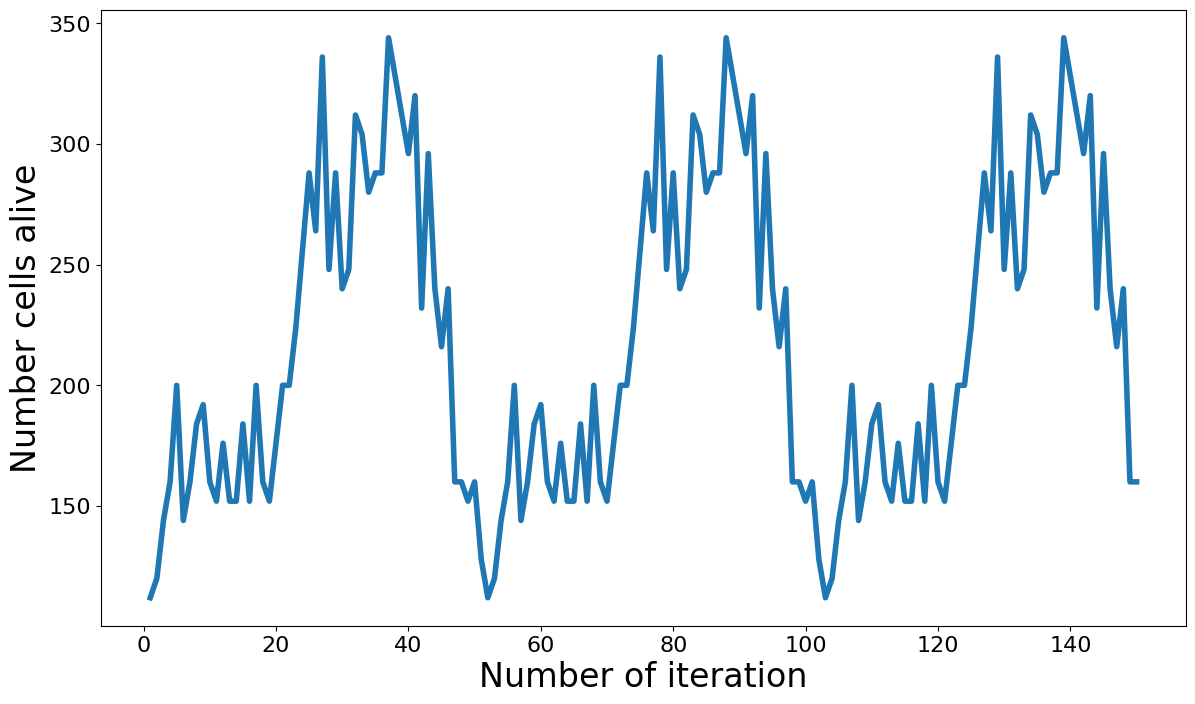

In [19]:
plot_alive_gif(start_112P51)

## Glider gun 

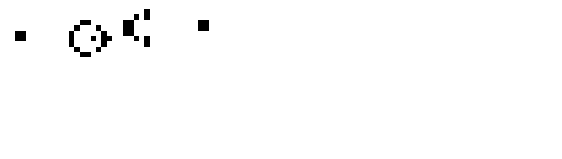

In [20]:
start_glider = """.........................X...........................................................................
.......................X.X...........................................................................
.............XX......XX............XX................................................................
............X...X....XX............XX................................................................
.XX........X.....X...XX..............................................................................
.XX........X...X.XX....X.X...........................................................................
...........X.....X.......X...........................................................................
............X...X....................................................................................
.............XX......................................................................................
.....................................................................................................
.....................................................................................................
.....................................................................................................
.....................................................................................................
.....................................................................................................
.....................................................................................................
.....................................................................................................
.....................................................................................................
.....................................................................................................
.....................................................................................................
.....................................................................................................
.....................................................................................................
.....................................................................................................
.....................................................................................................
.....................................................................................................
.....................................................................................................
....................................................................................................."""

start_glider = start_glider.replace('.', '0').replace('X', '1')
start_glider = np.array([list(row) for row in start_glider.split('\n')]).astype(np.float32)

plt.figure(figsize=(7, 4))
plt.imshow(start_glider, cmap=cm.binary)
plt.axis('off');

C:\Users\danil\AppData\Local\Temp\ipykernel_31496\168629230.py:47: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread('./gifs/' + name))


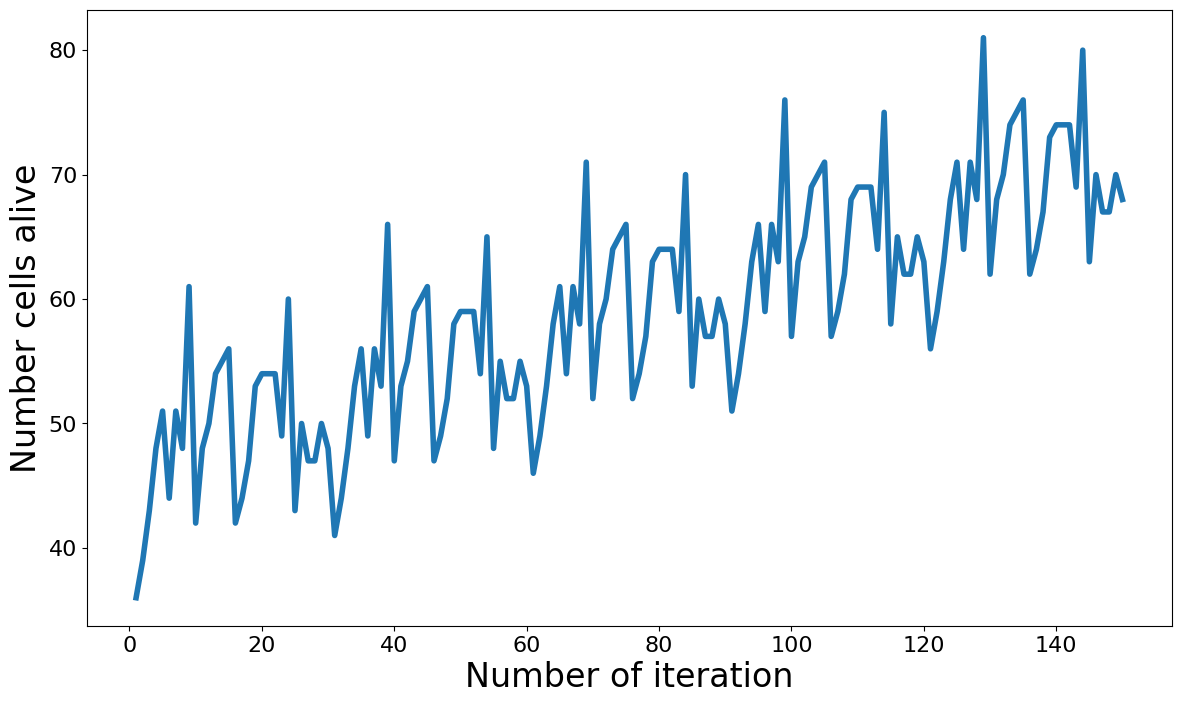

In [25]:
plot_alive_gif(start_glider)

## Infinite growth

In [ ]:
start_infinite = """............................................................
............................................................
............................................................
............................................................
............................................................
............................................................
............................................................
............................................................
............................................................
............................................................
............................................................
............................................................
............................................................
............................................................
............................................................
............................................................
............................................................
............................................................
............................................................
............................................................
............................................................
............................................................
............................................................
............................................................
............................................................
............................................................
............................................................
............................................................
................................O...........................
..............................O.OO..........................
..............................O.O...........................
..............................O.............................
............................O...............................
..........................O.O...............................
............................................................
............................................................
............................................................
............................................................
............................................................
............................................................
............................................................
............................................................
............................................................
............................................................
............................................................
............................................................
............................................................
............................................................
............................................................
............................................................
............................................................
............................................................
............................................................
............................................................
............................................................
............................................................
............................................................
............................................................
............................................................
............................................................"""

start_infinite = start_infinite.replace('.', '0').replace('O', '1')
start_infinite = np.array([list(row) for row in start_infinite.split('\n')]).astype(np.float32)

plt.figure(figsize=(7, 4))
plt.imshow(start_infinite, cmap=cm.binary)
plt.axis('off');

C:\Users\danil\AppData\Local\Temp\ipykernel_31496\168629230.py:47: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread('./gifs/' + name))


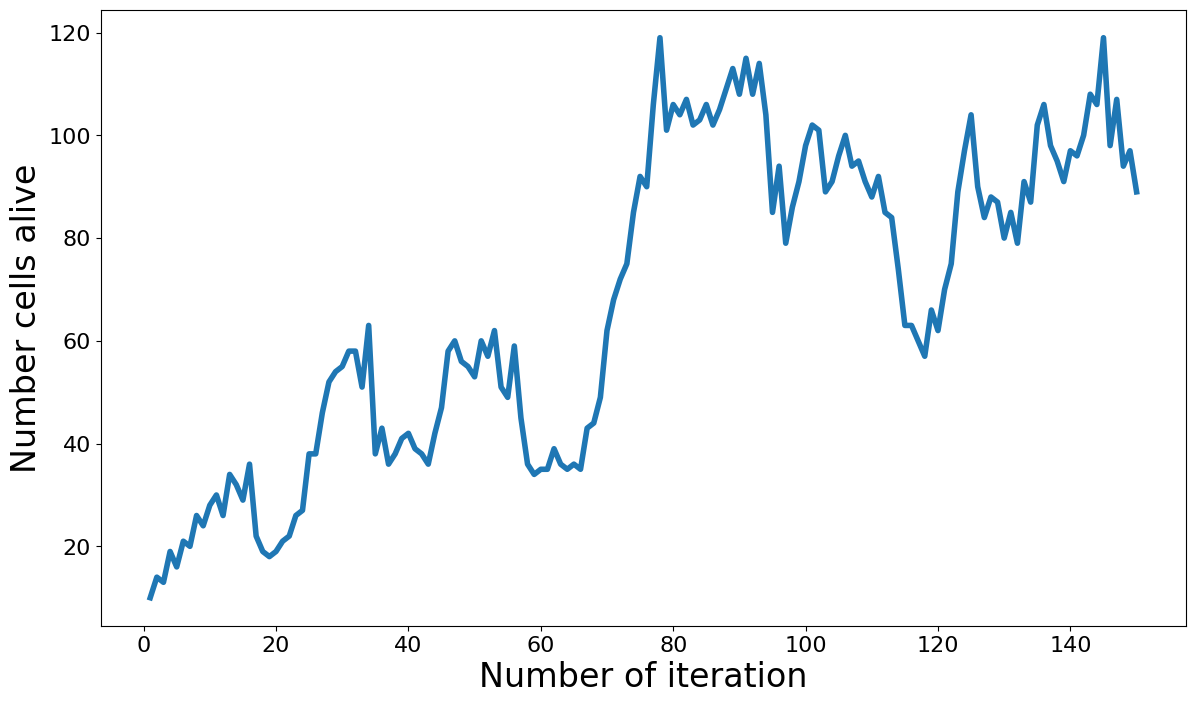

In [17]:
plot_alive_gif(start_infinite)

## Parallel version

In [23]:
%%writefile g.py
from mpi4py import MPI
import numpy as np
from scipy.sparse import rand
import math
from scipy.signal import convolve2d
import sys



comm = MPI.COMM_WORLD
rank = comm.Get_rank()
size = comm.Get_size()

start = MPI.Wtime()


step_count=100

part_up = (rank - 1 + size) % size
part_down = (rank + 1) % size
ker = np.array([[1, 1, 1],
                [1, 0, 1],
                [1, 1, 1]]).astype(np.float32)

if rank == 0:
    
    start_rand = rand(100, 100, format='csr', density=0.3)
    start_rand.data[: ]=1
    start_rand = start_rand.todense()
    height = start_rand.shape[0]
    step = height/size
    sumd_mapp = [start_rand[int(r * step): int((r + 1) * step)] for r in range(size)]
    
else:
    
    sumd_mapp = None

mapp = comm.scatter(sumd_mapp, root=0)

states_map = np.empty((step_count +1, *mapp.shape), dtype=np.float32)
cells_alive = np.empty(step_count +1, dtype=np.uint8)

states_map[0] = mapp
cells_alive[0] = np.sum(mapp)

for i in range(step_count):
    
    new_map_part = np.pad(mapp, 1, 'wrap')
    top_row = new_map_part[1]
    bottom_row = new_map_part[-2]

    comm.send(top_row, dest=part_up)
    new_map_part[-1]=comm.recv( source=part_down)
    comm.send(bottom_row, dest=part_down)
    new_map_part[0]=comm.recv( source=part_up)

    new_map_part = convolve2d(new_map_part, ker, mode='valid')
    new_map_part = np.where((new_map_part==3) | ((new_map_part==2) &(new_map_part==1)), 1., 0.)
    states_map[i+1] = new_map_part
    cells_alive[i+1] = np.sum(new_map_part)

states_mapGlobal=comm.gather(states_map, root=0)


# times will be saved in times.csv
if rank == 0:
    
    elapsed_time = MPI.Wtime() - start
    
    with open('times.csv', 'a+') as f:
        f.write(f'{size}, {elapsed_time}\n')

Overwriting g.py


In [24]:
!mpiexec -n 2 python g.py

In [ ]:
pros_list = np.linspace(1, 8, 8).astype(int)
step_count = 150
repeats_n = 4

for n_processes in nn:
    
    for j in range(repeats_n):
        
        !mpiexec -n {n_processes} python g.py

In [ ]:
sp_list = [] # get from times.csv

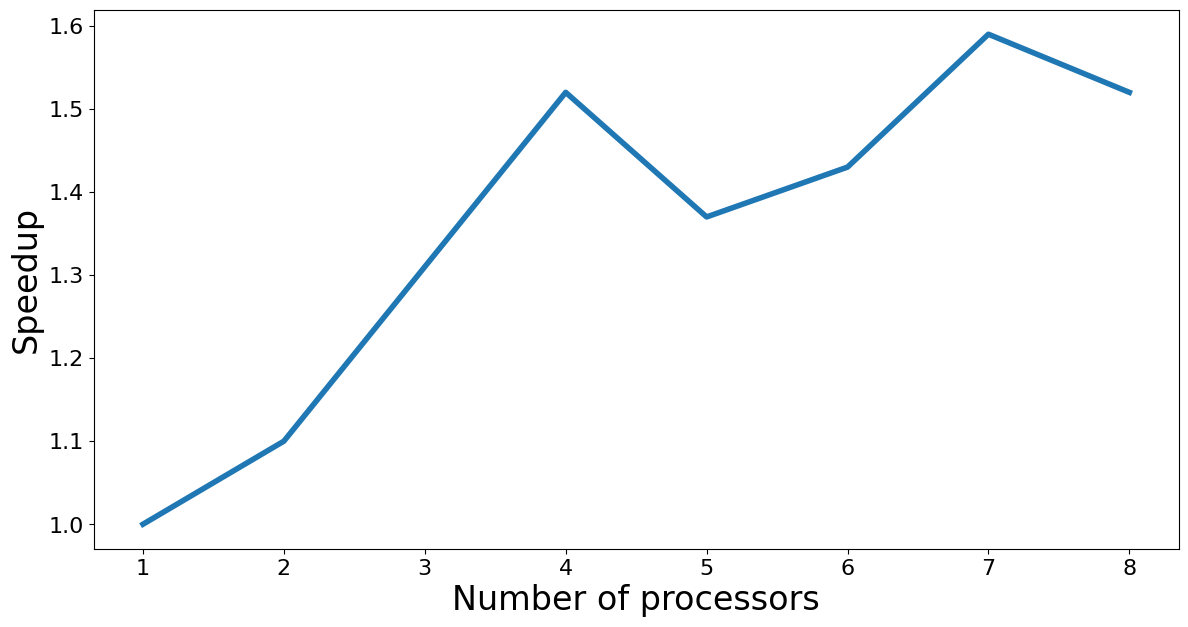

In [20]:
fig = plt.figure(figsize=(14, 7))

plt.plot(pros_list, sp_list, linewidth=4)
plt.tick_params(labelsize = 16)
plt.xlabel('Number of processors', fontsize=24)
plt.ylabel('Speedup', fontsize=24)
plt.show();